# Example for training ESN

Learning a simple sine wave. First, generating the training data (and some setup):

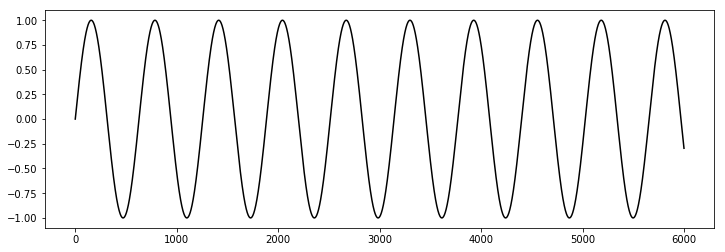

In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

sine_data = np.sin(np.arange(0, 60., 0.01))

plt.figure(figsize=(12,4))
plt.plot(np.arange(0,6000),sine_data,'k',label="Input function")


Training an Echo State Network to match this data:

test error: 
0.45576094804983375


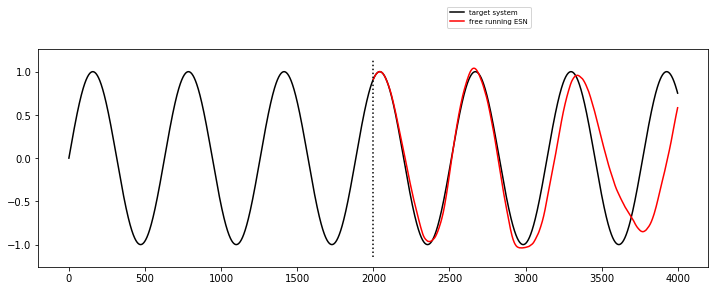

In [3]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 200,
          spectral_radius = 1.,
          random_state=42)

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),sine_data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - sine_data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(12,4))
plt.plot(range(0,trainlen+future),sine_data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

## Learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system

test error: 
0.08444031082684202


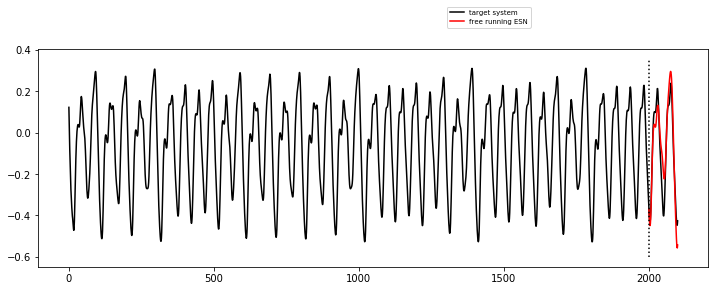

In [4]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
#sine_data = 
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 100,
          spectral_radius = 1.,
          random_state=42)

trainlen = 2000
future = 100
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(12,4))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

* Run the code for the ESN.
* Find appropriate values to learn the function.
* Prolong the time window of prediction (shown in red).
* Why is the difference between target and predicted function a problematic measure of the performance of the system?